In [1]:
import numpy as np
# import matplotlib
import matplotlib.cm
cmap = matplotlib.cm.get_cmap().copy()
cmap.set_bad('white',np.nan)
import matplotlib.pyplot as plt
# import matplotlib.patches as mpatches


theta1s = np.linspace(0.01, 1, 100)
theta2s = np.linspace(0.01, 1, 100)
num_grid = len(theta1s)
n = 2
alpha = 0.01


/tmp/ipykernel_2599026/884546396.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap().copy()


In [2]:


def compute_np_beta(alpha, theta1, theta2):
    res = 1 - alpha * (1 / 2 * theta2**2 + 1 / 4 * theta2 + 1 / 4) \
            - (1 - alpha) * (1 / 2 * theta1 * theta2 + 1 / 2 * theta1)
    return res


def compute_np_eta(alpha, theta1, theta2, np_beta, n=2):
    denom = n * alpha * (1 - np_beta)
    num = n * (theta1 * 2 * alpha * (1 - alpha)\
                + theta2 * alpha**2 * 3 / 4\
                + alpha**2 * 1 / 4)
  
    return num / denom


def compute_cp_beta(alpha, theta1, theta2):
    res = 1 - (0 * theta1 * theta2 + 1 / 2 * theta2**2 + 1 / 2 * theta1)
    return res


def compute_cp_eta(alpha, theta1, theta2, cp_beta, n=2):
    denom = n * alpha * (1 - cp_beta)
    num = n * alpha * (theta1 + 1 / 2 * theta2)
    return num / denom


def compute_efficiency(n, alpha, eta, beta):
    inv_eff = 1 / n + alpha * eta * (1 - beta)
    return 1 / inv_eff

def compute_lim_eta_ratio(theta1, theta2):
    return (2*theta1+theta2)*(theta2+1) / ( (theta1+theta2**2) * 4 )




In [41]:


def plot_diff_efficiency():

    diff_eff_vals = np.empty((num_grid, num_grid))
    diff_eff_vals[:] = np.nan

    delta_vals = np.empty((num_grid, num_grid))
    delta_vals[:] = np.nan
    
    for i in range(num_grid):
        for j in range(i, num_grid):
            theta1 = theta1s[i]
            theta2 = theta2s[j]

            np_beta = compute_np_beta(alpha, theta1, theta2)
            np_eta = compute_np_eta(alpha, theta1, theta2, np_beta)
            np_eff = compute_efficiency(n, alpha, np_eta, np_beta)

            cp_beta = compute_cp_beta(alpha, theta1, theta2)
            cp_eta = compute_cp_eta(alpha, theta1, theta2, cp_beta)
            cp_eff = compute_efficiency(n, alpha, cp_eta, cp_beta)
            
            diff_eff_vals[i,j] = cp_eff - np_eff

    data = diff_eff_vals.transpose()

    fig, ax = plt.subplots()
    im = ax.imshow(data, cmap = cmap, extent = [0, 100, 100, 0])
    cbar = ax.figure.colorbar(im, ax=ax)
    ax.set_xticks(np.linspace(0, 100, 6))
    ax.set_xticklabels(np.linspace(0, 100, 6) / 100)
    ax.set_yticks(np.linspace(0, 100, 6))
    ax.set_yticklabels(np.linspace(0, 100, 6) / 100)
    ax.set_xlabel(r'$\theta_1$')
    ax.set_ylabel(r'$\theta_2$')
    ax.set_title(r"${efficiency}_{CP,\alpha} - {efficiency}_{NP,\alpha}$")
    ax.text(12, 60, 'A', color='white')
    fig.tight_layout()
    #plt.show()
    plt.contour(data, levels = [0], colors = 'r', linewidth=5)
    ax.hlines(y=100, xmin=0, xmax=49, color='r', linestyle='-', linewidth=5)
    ax.vlines(x=0.1, ymin=2, ymax=100, color='r', linestyle='-', linewidth=5)

    plt.savefig('../figs/counterexample_alpha_over_2.pdf', format='pdf', dpi=600, bbox_inches='tight')

def plot_beta_ratio():

    beta_vals = np.empty((num_grid, num_grid))
    beta_vals[:] = np.nan
    for i in range(num_grid):
        for j in range(i, num_grid):
            theta1 = theta1s[i]
            theta2 = theta2s[j]

            np_beta = compute_np_beta(alpha, theta1, theta2)
            cp_beta = compute_cp_beta(alpha, theta1, theta2)
            
            beta_vals[i,j] = cp_beta - np_beta


    data = beta_vals.transpose()

    fig, ax = plt.subplots()
    im = ax.imshow(data, cmap = cmap, extent = [0, 100, 100, 0])
    cbar = ax.figure.colorbar(im, ax=ax)
    ax.set_xlim(-0.3, 100)
    ax.set_xticks(np.linspace(0, 100, 6))
    ax.set_xticklabels(np.linspace(0, 100, 6) / 100)
    ax.set_yticks(np.linspace(0, 100, 6))
    ax.set_yticklabels(np.linspace(0, 100, 6) / 100)
    ax.set_xlabel(r'$\theta_1$')
    ax.set_ylabel(r'$\theta_2$')
    ax.set_title(r"${\beta_{CP,\alpha}} \ -\  {\beta_{NP,\alpha}}$")
    #ax.text(1, 18, 'B', color='white')
    fig.tight_layout()
    #plt.show()
    plt.contour(data, levels = [0], colors = 'r', linewidth=5)
    #ax.hlines(y=100, xmin=0, xmax=49, color='r', linestyle='-', linewidth=5)
    #ax.vlines(x= -0.2, ymin=0, ymax=45, color='r', linestyle='-', linewidth=2)

    plt.savefig('../figs/counterexample_alpha_over_2_beta.pdf', format='pdf', dpi=600, bbox_inches='tight')


def plot_gamma_ratio():

    ratio_vals = np.empty((num_grid, num_grid))
    ratio_vals[:] = np.nan
    for i in range(num_grid):
        for j in range(i, num_grid):
            theta1 = theta1s[i]
            theta2 = theta2s[j]

            #ratio_vals[i,j] = compute_lim_eta_ratio(theta1, theta2) 
            np_beta = compute_np_beta(alpha, theta1, theta2)
            np_eta = compute_np_eta(alpha, theta1, theta2, np_beta)
            np_gamma = 1 / (1/(n*alpha*(1-np_beta)) + np_eta)

            cp_beta = compute_cp_beta(alpha, theta1, theta2)
            cp_eta = compute_cp_eta(alpha, theta1, theta2, cp_beta)
            cp_gamma = 1 / (1/(n*alpha*(1-cp_beta)) + cp_eta)
            
            ratio_vals[i,j] = cp_gamma / np_gamma


    data = ratio_vals.transpose()

    fig, ax = plt.subplots()
    im = ax.imshow(data, cmap = cmap, extent = [0, 100, 100, 0])
    cbar = ax.figure.colorbar(im, ax=ax)
    ax.set_xlim(-0.3, 100)
    ax.set_xticks(np.linspace(0, 100, 6))
    ax.set_xticklabels(np.linspace(0, 100, 6) / 100)
    ax.set_yticks(np.linspace(0, 100, 6))
    ax.set_yticklabels(np.linspace(0, 100, 6) / 100)
    ax.set_xlabel(r'$\theta_1$')
    ax.set_ylabel(r'$\theta_2$')
    ax.set_title(r"${\gamma_{CP,\alpha}} \ /\  {\gamma_{NP,\alpha}}$")
    # ax.text(1, 18, 'B', color='white')
    fig.tight_layout()
    #plt.show()
    plt.contour(data, levels = [1], colors = 'r', linewidth=5)
    #ax.hlines(y=100, xmin=0, xmax=49, color='r', linestyle='-', linewidth=5)
    # ax.vlines(x= -0.2, ymin=0, ymax=45, color='r', linestyle='-', linewidth=2)

    plt.savefig('../figs/counterexample_alpha_over_2_gamma.pdf', format='pdf', dpi=600, bbox_inches='tight')

    return ratio_vals



def plot_eta_ratio():

    ratio_vals = np.empty((num_grid, num_grid))
    ratio_vals[:] = np.nan
    for i in range(num_grid):
        for j in range(i, num_grid):
            theta1 = theta1s[i]
            theta2 = theta2s[j]

            #ratio_vals[i,j] = compute_lim_eta_ratio(theta1, theta2) 
            np_beta = compute_np_beta(alpha, theta1, theta2)
            np_eta = compute_np_eta(alpha, theta1, theta2, np_beta)

            cp_beta = compute_cp_beta(alpha, theta1, theta2)
            cp_eta = compute_cp_eta(alpha, theta1, theta2, cp_beta)
            
            ratio_vals[i,j] = cp_eta / np_eta


    data = ratio_vals.transpose()

    fig, ax = plt.subplots()
    im = ax.imshow(data, cmap = cmap, extent = [0, 100, 100, 0])
    cbar = ax.figure.colorbar(im, ax=ax)
    ax.set_xlim(-0.3, 100)
    ax.set_xticks(np.linspace(0, 100, 6))
    ax.set_xticklabels(np.linspace(0, 100, 6) / 100)
    ax.set_yticks(np.linspace(0, 100, 6))
    ax.set_yticklabels(np.linspace(0, 100, 6) / 100)
    ax.set_xlabel(r'$\theta_1$')
    ax.set_ylabel(r'$\theta_2$')
    ax.set_title(r"${\eta_{CP,\alpha}} \ /\  {\eta_{NP,\alpha}}$")
    ax.text(1, 18, 'B', color='white')
    fig.tight_layout()
    #plt.show()
    plt.contour(data, levels = [1.001], origin = "lower", colors = 'r', linewidth=5)
    #ax.hlines(y=100, xmin=0, xmax=49, color='r', linestyle='-', linewidth=5)
    ax.vlines(x= -0.2, ymin=0, ymax=45, color='r', linestyle='-', linewidth=2)

    plt.savefig('../figs/counterexample_alpha_over_2_eta.pdf', format='pdf', dpi=600, bbox_inches='tight')


def plot_lim_eta_ratio():

    ratio_vals = np.empty((num_grid, num_grid))
    ratio_vals[:] = np.nan
    for i in range(num_grid):
        for j in range(i, num_grid):
            theta1 = theta1s[i]
            theta2 = theta2s[j]

            ratio_vals[i,j] = compute_lim_eta_ratio(theta1, theta2) 

    data = ratio_vals.transpose()

    fig, ax = plt.subplots()
    im = ax.imshow(data, cmap = cmap, extent = [0, 100, 100, 0])
    cbar = ax.figure.colorbar(im, ax=ax)
    ax.set_xticks(np.linspace(0, 100, 6))
    ax.set_xticklabels(np.linspace(0, 100, 6) / 100)
    ax.set_yticks(np.linspace(0, 100, 6))
    ax.set_yticklabels(np.linspace(0, 100, 6) / 100)
    ax.set_xlabel(r'$\theta_1$')
    ax.set_ylabel(r'$\theta_2$')
    ax.set_title(r"$\lim_{\alpha\to 0^+} \ {\eta_{CP,\alpha}}\ /\ {\eta_{NP,\alpha}}$")
    fig.tight_layout()
    #plt.show()
    plt.contour(data, levels = [1], colors = 'r', linewidth=5)
    #ax.hlines(y=100, xmin=0, xmax=49, color='r', linestyle='-', linewidth=5)
    #ax.vlines(x=0, ymin=0, ymax=43, color='r', linestyle='-', linewidth=5)

    plt.savefig('../figs/counterexample_alpha_over_2_eta_limit.pdf', format='pdf', dpi=600, bbox_inches='tight')



/tmp/ipykernel_2599026/1270554710.py:120: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(data, levels = [1], colors = 'r', linewidth=5)


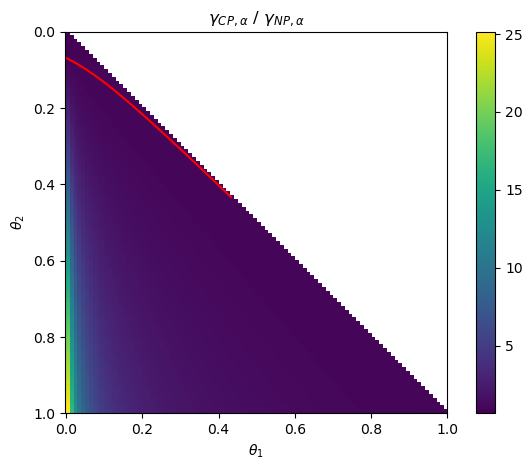

In [34]:
gamma_ratio_vals = plot_gamma_ratio()

/tmp/ipykernel_2599026/1270554710.py:76: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(data, levels = [0], colors = 'r', linewidth=5)


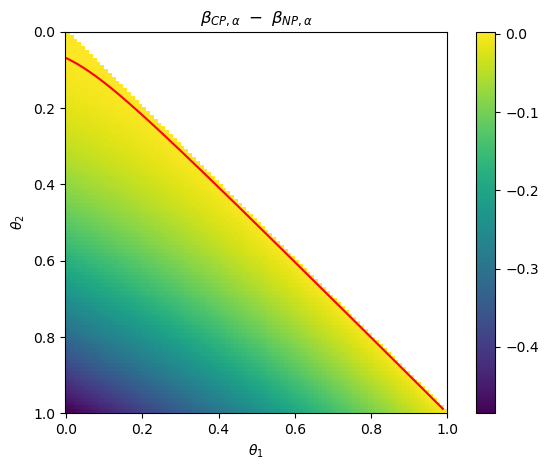

In [35]:
plot_beta_ratio()

/tmp/ipykernel_2599026/1270554710.py:39: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(data, levels = [0], colors = 'r', linewidth=5)


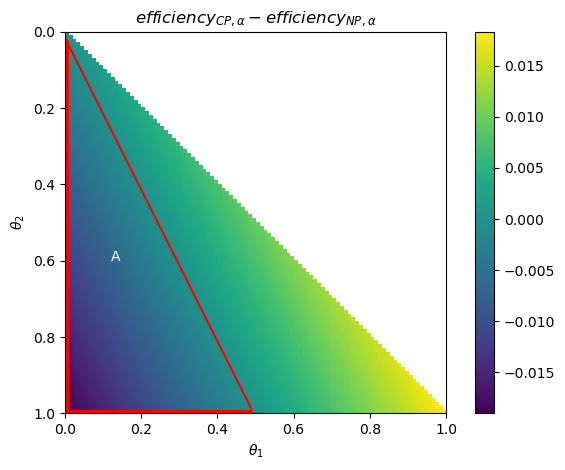

In [36]:
plot_diff_efficiency()

/tmp/ipykernel_2599026/1270554710.py:165: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(data, levels = [1.001], origin = "lower", colors = 'r', linewidth=5)


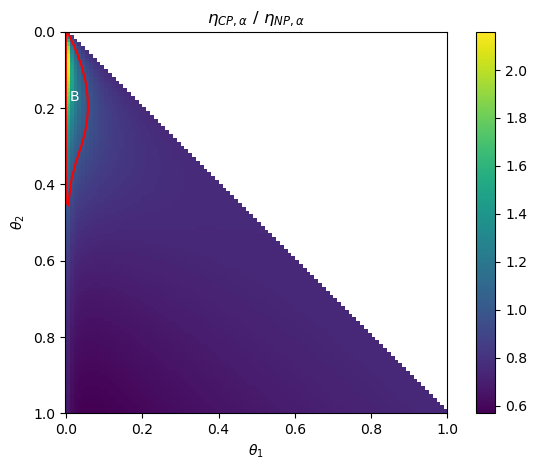

In [37]:
plot_eta_ratio()

/tmp/ipykernel_2599026/905994425.py:197: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(data, levels = [1], colors = 'r', linewidth=5)


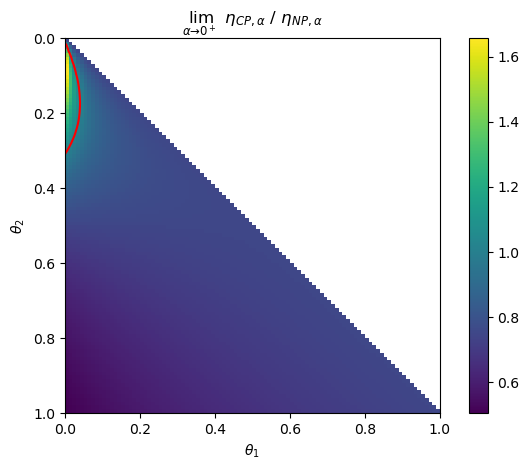

In [42]:
plot_lim_eta_ratio()

/tmp/ipykernel_2599026/905994425.py:39: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(data, levels = [0], colors = 'r', linewidth=5)


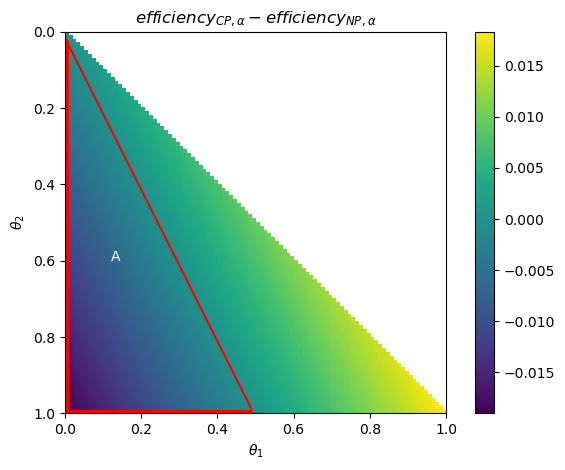

In [43]:
plot_diff_efficiency()